In [73]:
import numpy as np
import matplotlib.pyplot as plt

d. Cálculo del potencial en cualquier punto del espacio

In [74]:
#Creación de función que calcula el potencial en cualquier punto n
def V(x):
    
    #Función original
    return (x**2)/2

def potencial_xi (n, h):
    V = ((n*h)**2)/2
    return V

#Funcion que retorna una lista de todos los potenciales en las discretizaciones
def todos_V (h):
    todos = []
    for i in range (-500, 501):
        a = potencial_xi(i, h)
        todos.append(a)
    return todos

todos_V(0.01)


[12.5,
 12.450050000000001,
 12.400200000000002,
 12.350449999999999,
 12.3008,
 12.25125,
 12.201800000000002,
 12.152449999999998,
 12.1032,
 12.05405,
 12.005000000000003,
 11.956049999999998,
 11.9072,
 11.858450000000001,
 11.809800000000001,
 11.761250000000002,
 11.7128,
 11.66445,
 11.616200000000001,
 11.568050000000003,
 11.52,
 11.47205,
 11.4242,
 11.376450000000002,
 11.3288,
 11.28125,
 11.2338,
 11.186450000000002,
 11.139199999999999,
 11.09205,
 11.045000000000002,
 10.998050000000001,
 10.951199999999998,
 10.904449999999999,
 10.857800000000001,
 10.811250000000001,
 10.7648,
 10.718449999999999,
 10.6722,
 10.626050000000001,
 10.580000000000002,
 10.534049999999999,
 10.4882,
 10.442450000000001,
 10.396800000000002,
 10.351249999999999,
 10.3058,
 10.26045,
 10.215200000000003,
 10.17005,
 10.125,
 10.080050000000002,
 10.035200000000001,
 9.99045,
 9.9458,
 9.901250000000001,
 9.856800000000002,
 9.812449999999998,
 9.7682,
 9.72405,
 9.680000000000001,
 9.63605,

e. Función de Método de Numerov

In [75]:
# Código de Numerov 

# Ahora, ejecutamos el método 
def numerov(x,E,h,V):
    
    # Dado que s es cero, definmos R_n 
    R_n = [(2*V[i] - 2*E) for i in range (0,1000)]
    
    # Creamos una lista para poder guardar el siguiente dato cálculado por Numerov
    psi = [0, 1e-5]
    
    # Hacemos el algoritmo de Numerov teniendo en cuenta que se debe iniciar 1 antes y terminar uno después
    for i in range(1,(len(x))-1):
        psi_n = (2 * (1 + (5/12 * h**2) * R_n[i]) * psi[i]) - ((1 - (h**2/12 * R_n[i-1])) * psi[i-1])
        denom = (1 - (h**2/12 * R_n[i+1]))
        
        psi.append(psi_n/denom) 
    
    return psi


In [76]:
# Creamos una lista de valores para x
x = np.linspace(-5,5,1000)
h = 10/999

In [77]:
V = V(x)
print(V)

[1.25000000e+01 1.24500001e+01 1.24001003e+01 1.23503008e+01
 1.23006014e+01 1.22510023e+01 1.22015033e+01 1.21521046e+01
 1.21028060e+01 1.20536077e+01 1.20045095e+01 1.19555116e+01
 1.19066138e+01 1.18578163e+01 1.18091189e+01 1.17605218e+01
 1.17120248e+01 1.16636281e+01 1.16153315e+01 1.15671352e+01
 1.15190391e+01 1.14710431e+01 1.14231474e+01 1.13753518e+01
 1.13276565e+01 1.12800613e+01 1.12325664e+01 1.11851717e+01
 1.11378771e+01 1.10906828e+01 1.10435886e+01 1.09965947e+01
 1.09497010e+01 1.09029074e+01 1.08562141e+01 1.08096209e+01
 1.07631280e+01 1.07167353e+01 1.06704427e+01 1.06242504e+01
 1.05781582e+01 1.05321663e+01 1.04862746e+01 1.04404830e+01
 1.03947917e+01 1.03492006e+01 1.03037096e+01 1.02583189e+01
 1.02130283e+01 1.01678380e+01 1.01227479e+01 1.00777579e+01
 1.00328682e+01 9.98807867e+00 9.94338934e+00 9.89880020e+00
 9.85431127e+00 9.80992254e+00 9.76563400e+00 9.72144567e+00
 9.67735754e+00 9.63336961e+00 9.58948187e+00 9.54569434e+00
 9.50200701e+00 9.458419

In [99]:
# Ejecución del método 
psi = numerov(x,5.5,h,V)
max_psi = max(psi)
min_psi = min(psi)

psi_norm = [(psi[i] - min_psi)/(max_psi - min_psi) for i in range(len(psi))]

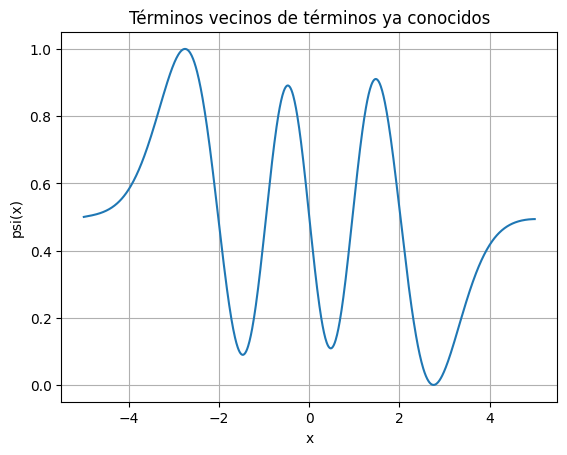

In [100]:
# Gráfica para el caso de E=0.5
plt.plot(x,psi_norm)
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.title('Términos vecinos de términos ya conocidos')
plt.grid(True)
plt.show()

### Iteral (f): Cálculo de valores propios

In [103]:
#Vamos a crear una función que encuentre el valor propio del operador de energía

def eigenvalues(x, E_val, V, h):
    
    #Creamos una variable donde se guardará la multiplicación de psi[-1](E) por psi[-1](E+dE)
    E_i = []
    
    #hacemos un ciclo, para que se detenga la ejecución cuando encuentre el valor propio
    for i in range(len(E_val)):
        value = 0
        while value >= 0:
        
            #Extraemos los valores de psi(E) y psi(E+dE) y extraemos el ultimo valor
            psi_E = numerov(x, E_val[i], h, V)
            psi_dE = numerov(x, E_val[i] + 0.001, h, V)
            
            #Ahora, multiplicamos y asignamos este valor a la variable value. Además, reasignamos E
            value = psi_E[-1] * psi_dE[-1]
            E_val[i] = E_val[i] + 0.001
            
        E_i.append(E_val[i])
    
    #Volverá a empezar el ciclo si Value es positivo
    return E_i

In [104]:
#Probaremos el valor propio de E con un E=2.5
val_E=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

E_i = eigenvalues(x, val_E, V, h)
print(E_i)

[0.501, 1.501, 2.501, 3.501, 4.501, 5.501]


### Iteral (f): Cálculo de valores propios

In [117]:
# Para encontrar el espectro del operador, se evalua los valores esperados en la función de onda 
# obtenida con Numerov 
spectrum = []

for i in range(0,6):
    psi_E = numerov(x, round(E_i[i],1), h, V)
    psi_Emax = max(psi_E)
    psi_Emin = min(psi_E)
    psi_Enorm = [(psi_E[i] - psi_Emin)/(psi_Emax - psi_Emin) for i in range(len(psi_E))]
    spectrum.append(psi_Enorm)

### Iteral (h): Gráfica de energías

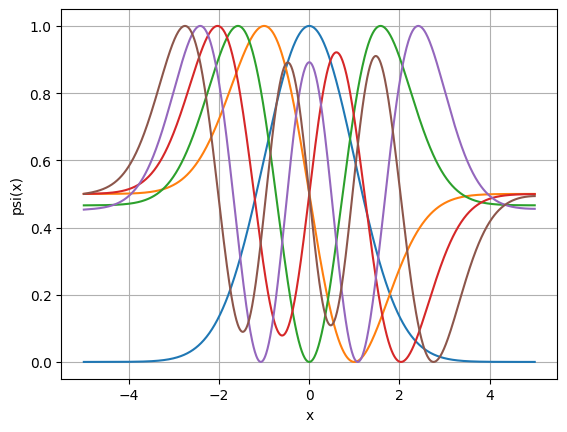

In [118]:
#Gráficaremos las listas del punto anterior
plt.plot(x,spectrum[0])
plt.plot(x,spectrum[1])
plt.plot(x,spectrum[2])
plt.plot(x,spectrum[3])
plt.plot(x,spectrum[4])
plt.plot(x,spectrum[5])
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.grid(True)
plt.show()

### Iteral (I): Cálculo de los 5 primeros niveles de energía para un potencial específico

In [55]:
# Primero definimos el nuevo potencial 
def V_1(x):
    exp = -(x**2)/20
    v = -10 * (np.exp(exp))
    return v

In [56]:
# Definimos x para el rango establecido 
x = np.linspace(-1000,1000,1000)

V_1 = V_1(x)

In [58]:
# Sacamos los valores E_n (estados ligados)
E_n1 = [-9.51, -8.54, -7.62, -6.74, -5.89]

ligados1 = [numerov(x, E_n1[i], 0.01, V_1) for i in range(len(E_n1))]

print(ligados1)

[[0, 1e-05, 2.0019023015147902e-05, 3.007612824810213e-05, 4.019044734538174e-05, 5.038122079152656e-05, 6.066783451030007e-05, 7.106985674256155e-05, 8.160707527096029e-05, 9.229953506226456e-05, 0.00010316757639893216, 0.00011423187357246065, 0.00012551347421212332, 0.00013703383932390625, 0.00014881488411581256, 0.00016087901968719564, 0.0001732491956614276, 0.00018594894384300244, 0.00019900242298212344, 0.00021243446473193022, 0.00022627062088579012, 0.00024053721198451352, 0.00025526137738595843, 0.0002704711268922721, 0.00028619539403297985, 0.00030246409110528256, 0.0003193081660762644, 0.0003367596614552579, 0.0003548517752483579, 0.0003736189241110387, 0.0003930968088190101, 0.000413322482181857, 0.0004343344195286552, 0.0004561725918996482, 0.0004788785420832175, 0.0005024954636427921, 0.0005270682830840293, 0.000552643745318575, 0.0005792705025869793, 0.000606999207009928, 0.0006358826069438479, 0.0006659756473241856, 0.0006973355741872415, 0.0007300220435693906, 0.00076409

In [59]:
# Evaluamos los valores propios en Numerov para encontrar el espectro del operador
val_E_n1 = [-9.51, -8.54, -7.62, -6.74, -5.89]

E_i1 = eigenvalues(x, val_E, V_1)
print(E_i1)

[1.7809999999999144, 3.1649999999998166, 3.1649999999999268, 4.9450000000002605, 5.905000000000469, 5.905000000000135]


### Iteral (J): Evaluar los dos primeros estaos para un potencial dado

In [60]:
# Se repite el proceso ejecutado en el iteral (i) 
def V_2(x):
    v = -4/((1 + x**2))**2
    return v

In [61]:
# Definimos x para el rango establecido 
x = np.linspace(-1000,1000,1000)

V_2 = V_2(x)

In [62]:
# Sacamos los valores E_n (estados ligados)
E_n2 = [-1.478, -0.163]

ligados2 = [numerov(x, E_n2[i], 0.01, V_2) for i in range(len(E_n2))]
print(ligados2)

[[0, 1e-05, 2.000295607281792e-05, 3.0011825165108325e-05, 4.002956597145741e-05, 5.005913980899463e-05, 6.010351149277963e-05, 7.016565021222316e-05, 8.024853040880108e-05, 9.035513265532094e-05, 0.00010048844453700099, 0.00011065146153462212, 0.00012084718791001378, 0.0001310786375941357, 0.00014134883507801782, 0.00015166081630682177, 0.00016201762957728853, 0.00017242233643883698, 0.00018287801259858036, 0.0001933877488305275, 0.00020395465188923832, 0.00021458184542820293, 0.00022527247092321649, 0.00023602968860102222, 0.00024685667837349745, 0.00025775664077765884, 0.0002687327979217643, 0.00027978839443779167, 0.00029092669844057566, 0.0003021510024938863, 0.0003134646245837348, 0.00032487090909919436, 0.000336373227821026, 0.00034797498091840133, 0.0003596795979540174, 0.00037149053889790046, 0.0003834112951501983, 0.00039544539057326353, 0.00040759638253333306, 0.00041986786295211134, 0.0004322634593685685, 0.0004447868360112674, 0.0004574416948815362, 0.00047023177684780705,

In [63]:
# Evaluamos los valores propios en Numerov para encontrar el espectro del operador
val_E_n2 = [-1.478, -0.163]

E_i2 = eigenvalues(x, val_E_n2, V_2)
print(E_i2)

[0.04599999999994829, 0.046000000000000166]
